# Задание 1

NER - named entity recognition - задача извлечения именнованных сущностей из текста.
Классические методы для задачи NER:

LSTM:так как это форма rnn то олично подходит для nlp. lstm хорошо улавливает не только контекст слова в небольшой лингвистической структуре, но и вивдит зависимости в предложениях и абзацах

HMM: В основе HMM лежит предположение о том, что каждое слово или токен в тексте генерируется процессом находящимся в некотором скрытом состоянии, и что состояния изменяются в соответствии с марковским процессом. Для NER используется алгоритм Витбери который помоает найти наиболее вероятную поледовательность entity в тексте.


Применение LLM: Текст подается в модель, и используется для генерации предсказаний о том, к какой категории именованных сущностей относится каждое слово или фраза. Т.е для моделей как GPT или Гигачат, можно формулировать запросы непосредственно в форме вопросов или указаний, например, попросив модель "Идентифицировать все имена людей в следующем тексте" Далее мы так и будем делать но использовать более сложные интрукции.

Для моделей как BERT, можно дообучить модель на аннотированных данных NER, добавив на верхний слой модели классификационный слой для предсказания категорий сущностей.Bert хорошо подходит для задачи ner тк хорошо пониамает семантическую связь между словами(из за двунаправленной структуры).

Для оценки обычно использую precision, recall, f1, roc. А можно польностью рисовать confusion matrix

# Задание 2

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
#pip install ipytest # для юнит тестов
#pip install pytest

In [3]:
import pytest
import ipytest

In [4]:
directory_path = 'data/ru'

df = pd.DataFrame(columns=['Filename', 'Content'])

for filename in os.listdir(directory_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(directory_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            df = df.append({'Filename': filename, 'Content': content}, ignore_index=True)

In [5]:
df

,Filename,Content
0,brexit_ru.txt_file_10.txt,ru-10\nru\n2018-09-20\nhttps://rg.ru/2018/09/2...
1,brexit_ru.txt_file_1006.txt,ru-1006\nru\n2018-07-09\nhttp://polit.ru/news/...
2,brexit_ru.txt_file_1004.txt,ru-1004\nru\n2018-07-09\nhttp://www.aif.ru/pol...
3,brexit_ru.txt_file_1011.txt,ru-1011\nru\n2018-07-09\nhttps://tsargrad.tv/n...
4,brexit_ru.txt_file_1001.txt,ru-1001\nru\n2018-07-09\nhttps://rg.ru/2018/07...
5,brexit_ru.txt_file_1000.txt,ru-1000\nru\n2018-07-09\nhttp://news.meta.ua/u...
6,brexit_ru.txt_file_1002.txt,ru-1002\nru\n2018-07-09\nhttps://echo.msk.ru/n...
7,brexit_ru.txt_file_1017.txt,ru-1017\nru\n2018-07-09\nhttp://www.unn.com.ua...
8,brexit_ru.txt_file_1003.txt,ru-1003\nru\n2018-07-09\nhttps://echo.msk.ru/n...


In [6]:
directory_path = 'data/ann_ru'

if os.path.exists(directory_path):
    df_system_responses = pd.DataFrame(columns=['Filename', 'Content'])
    
    for filename in os.listdir(directory_path):
        if filename.endswith('.out'):
            file_path = os.path.join(directory_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
                df_system_responses = df_system_responses.append({'Filename': filename, 'Content': content}, ignore_index=True)

In [7]:
df_system_responses

,Filename,Content
0,brexit_ru.txt_file_10.out,ru-10\nBrexit\tBrexit\tEVT\tEVT-Brexit\nАльбио...
1,brexit_ru.txt_file_1006.out,ru-1006\nBrexit\tBrexit\tEVT\tEVT-Brexit\nFace...
2,brexit_ru.txt_file_1011.out,ru-1011\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...
3,brexit_ru.txt_file_1004.out,ru-1004\nBrexit\t\tEVT\tEVT-Brexit\nБорис Джон...
4,brexit_ru.txt_file_1000.out,ru-1000\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...
5,brexit_ru.txt_file_1001.out,ru-1001\nAssociated Press\t\tORG\tORG-The-Asso...
6,brexit_ru.txt_file_1017.out,ru-1017\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...
7,brexit_ru.txt_file_1003.out,ru-1003\nБорис Джонсон\tБорис Джонсон\tPER\tPE...
8,brexit_ru.txt_file_1002.out,ru-1002\nБориса Джонсона\tБорис Джонсон\tPER\t...


In [8]:
def replace_newlines(text):
    return text.replace('\n', ' ')

df['Content'] = df['Content'].apply(replace_newlines)

#df_system_responses['Content'] = df_system_responses['Content'].apply(replace_newlines)

In [9]:
df['document_id'] = df['Filename'].str.extract(r'(\d+)')
df_system_responses['document_id'] = df_system_responses['Filename'].str.extract(r'(\d+)')

In [10]:
df_all = pd.merge(df, df_system_responses, on='document_id', how='inner')

df_all[['document_id', 'Content_x', 'Content_y']]

,document_id,Content_x,Content_y
0,10,ru-10 ru 2018-09-20 https://rg.ru/2018/09/20/t...,ru-10\nBrexit\tBrexit\tEVT\tEVT-Brexit\nАльбио...
1,1006,ru-1006 ru 2018-07-09 http://polit.ru/news/201...,ru-1006\nBrexit\tBrexit\tEVT\tEVT-Brexit\nFace...
2,1004,ru-1004 ru 2018-07-09 http://www.aif.ru/politi...,ru-1004\nBrexit\t\tEVT\tEVT-Brexit\nБорис Джон...
3,1011,ru-1011 ru 2018-07-09 https://tsargrad.tv/news...,ru-1011\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...
4,1001,ru-1001 ru 2018-07-09 https://rg.ru/2018/07/09...,ru-1001\nAssociated Press\t\tORG\tORG-The-Asso...
5,1000,ru-1000 ru 2018-07-09 http://news.meta.ua/ua/c...,ru-1000\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...
6,1002,ru-1002 ru 2018-07-09 https://echo.msk.ru/news...,ru-1002\nБориса Джонсона\tБорис Джонсон\tPER\t...
7,1017,ru-1017 ru 2018-07-09 http://www.unn.com.ua/ru...,ru-1017\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...
8,1003,ru-1003 ru 2018-07-09 https://echo.msk.ru/news...,ru-1003\nБорис Джонсон\tБорис Джонсон\tPER\tPE...


In [11]:
df_all.rename(columns={'Content_x': 'document_text', 'Content_y': 'gold_answer'}, inplace=True)
df_all['entity'] = np.nan

df_all[['document_id', 'document_text', 'gold_answer', 'entity']].head()

,document_id,document_text,gold_answer,entity
0,10,ru-10 ru 2018-09-20 https://rg.ru/2018/09/20/t...,ru-10\nBrexit\tBrexit\tEVT\tEVT-Brexit\nАльбио...,NaN
1,1006,ru-1006 ru 2018-07-09 http://polit.ru/news/201...,ru-1006\nBrexit\tBrexit\tEVT\tEVT-Brexit\nFace...,NaN
2,1004,ru-1004 ru 2018-07-09 http://www.aif.ru/politi...,ru-1004\nBrexit\t\tEVT\tEVT-Brexit\nБорис Джон...,NaN
3,1011,ru-1011 ru 2018-07-09 https://tsargrad.tv/news...,ru-1011\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...,NaN
4,1001,ru-1001 ru 2018-07-09 https://rg.ru/2018/07/09...,ru-1001\nAssociated Press\t\tORG\tORG-The-Asso...,NaN


In [12]:
df_all = df_all.drop('Filename_x', axis=1)
df_all = df_all.drop('Filename_y', axis=1)

# Задание 3

In [13]:
# def prepare_input(data_row):
#     instruction = (
#         "Анализируйте следующий текст и идентифицируйте каждое вхождение именованных сущностей. "
#         "Классифицируйте каждое упоминание в одну из следующих категорий и предоставьте информацию в указанном формате:\n"
#         "- Личности (PER): упоминания индивидуальных людей или групп.\n"
#         "- Организации (ORG): государственные учреждения, компании, некоммерческие организации и т. д.\n"
#         "- Местоположения (LOC): географические объекты, включая города, страны, реки, горные хребты.\n"
#         "- События (EVT): важные исторические или текущие события, конференции, праздники.\n"
#         "- Продукты (PRO): товары, услуги, включая книги, автомобили, программное обеспечение.\n"
#         "Для каждого упоминания сущности укажите её название, лемму, тип сущности и уникальный идентификатор. "
#         "Формат ответа должен быть следующим: каждое упоминание на новой строке, поля разделены табуляцией. "
#         "Поля должны включать: Название сущности, Лемма, Тип сущности, Уникальный идентификатор. "
#         "Например:\n"
#         "'Brexit\tBrexit\tEVT\tEVT-Brexit'\n"
#         "'The Guardian\tThe Guardian\tPRO\tPRO-The-Guardian'\n"
#         "'Boris Johnson\tBoris Johnson\tPER\tPER-Boris-Johnson'\n"
#         "'London\tLondon\tLOC\tGPE-London'\n"
#         "'Apple Inc.\tApple\tORG\tORG-Apple'\n"
#         "Убедитесь, что каждое упоминание сущности обработано и ответ соответствует этому формату."
#     )
#     text = f"Текст: {data_row['document_text']}"
#     return f"{instruction} {text}"

In [14]:
def prepare_input(data_row):
    instruction = (
        "As a data analyst specializing in text analysis, you are tasked with the meticulous job of identifying every named entity in the provided text. "
        "This includes recognizing every occurrence of a named entity, even if it is mentioned multiple times throughout the text. "
        "Classify each entity according to the 5 categories listed below and provide detailed information for each occurrence using the specified format:\n"
        "- Persons (PER): Individuals or groups of people.\n"
        "- Organizations (ORG): Government bodies, companies, non-profits, and political organizations.\n"
        "- Locations (LOC): Geographic locations like cities, countries, rivers, and mountain ranges.\n"
        "- Events (EVT): Significant historical or current events, conferences, and holidays.\n"
        "- Products (PRO): Goods and services, including books, vehicles, and software.\n"
        "For absolutely each entity mention, record the entity name (in form as mentioned in the text), its normalized form (lemma), the entity type, and a unique identifier that distinguishes each occurrence, even those referring to the same entity. "
        "Present your findings in a structured format with each entity occurrence on a new line, separated by tabs.Examples (there one entity mentioned twice in text you need to write about every mention) exctly in this format:\n"
        "'Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-Johnson'\n"
        "'Бориса Джонсона\tБорис Джонсон\tPER\tPER-Boris-Johnson'\n"
        "Ensure accuracy in identification and formatting, as this data will contribute to a larger database for linguistic analysis."
    )
    text = f"Text provided: {data_row['document_text']}"
    return f"{instruction}\n{text}"


In [15]:
# def prepare_input(data_row):
#     instruction = ("""
#         Imagine that you work as an python interpreter that uses NLP methods and your task is to locate all names in the text, find its lemma (original form of the word) and assign for each name (even if it is the same you meet before) its category ("- Persons (PER): Individuals or groups of people.", "- Organizations (ORG): Government bodies, companies, non-profits, and political organizations.\n", "- Locations (LOC): Geographic locations like cities, countries, rivers, and mountain ranges.\n", "- Events (EVT): Significant historical or current events, conferences, and holidays.\n", "- Products (PRO): Goods and services, including books, vehicles, and software." 
# For absolutely each name mention, record the name (in form as mentioned in the text), its normalized form (lemma), the name type, and a unique identifier that distinguishes each occurrence, even those referring to the same name. "
#         "Present your findings in a structured format with each name occurrence on a new line, separated by tabs. Examples (there one name mentioned twice in text you need to write about every mention) exactly in this format:\n"
#         "'Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-Johnson'\n"
#         "'Бориса Джонсона\tБорис Джонсон\tPER\tPER-Boris-Johnson'\n"
#         "Ensure accuracy in identification and formatting, as this data will contribute to a larger database for linguistic analysis.""")
#     text = f"Text provided: {data_row['document_text']}"
#     return f"{instruction}\n{text}"


In [16]:
df_all['llm_input'] = df_all.apply(prepare_input, axis=1)

print(df_all[['document_id', 'llm_input']].head())


  document_id                                          llm_input
0          10  As a data analyst specializing in text analysi...
1        1006  As a data analyst specializing in text analysi...
2        1004  As a data analyst specializing in text analysi...
3        1011  As a data analyst specializing in text analysi...
4        1001  As a data analyst specializing in text analysi...


In [17]:
df_all

,document_text,document_id,gold_answer,entity,llm_input
0,ru-10 ru 2018-09-20 https://rg.ru/2018/09/20/t...,10,ru-10\nBrexit\tBrexit\tEVT\tEVT-Brexit\nАльбио...,NaN,As a data analyst specializing in text analysi...
1,ru-1006 ru 2018-07-09 http://polit.ru/news/201...,1006,ru-1006\nBrexit\tBrexit\tEVT\tEVT-Brexit\nFace...,NaN,As a data analyst specializing in text analysi...
2,ru-1004 ru 2018-07-09 http://www.aif.ru/politi...,1004,ru-1004\nBrexit\t\tEVT\tEVT-Brexit\nБорис Джон...,NaN,As a data analyst specializing in text analysi...
3,ru-1011 ru 2018-07-09 https://tsargrad.tv/news...,1011,ru-1011\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...,NaN,As a data analyst specializing in text analysi...
4,ru-1001 ru 2018-07-09 https://rg.ru/2018/07/09...,1001,ru-1001\nAssociated Press\t\tORG\tORG-The-Asso...,NaN,As a data analyst specializing in text analysi...
5,ru-1000 ru 2018-07-09 http://news.meta.ua/ua/c...,1000,ru-1000\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...,NaN,As a data analyst specializing in text analysi...
6,ru-1002 ru 2018-07-09 https://echo.msk.ru/news...,1002,ru-1002\nБориса Джонсона\tБорис Джонсон\tPER\t...,NaN,As a data analyst specializing in text analysi...
7,ru-1017 ru 2018-07-09 http://www.unn.com.ua/ru...,1017,ru-1017\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...,NaN,As a data analyst specializing in text analysi...
8,ru-1003 ru 2018-07-09 https://echo.msk.ru/news...,1003,ru-1003\nБорис Джонсон\tБорис Джонсон\tPER\tPE...,NaN,As a data analyst specializing in text analysi...


In [18]:
df_all.loc[8, 'llm_input']

"As a data analyst specializing in text analysis, you are tasked with the meticulous job of identifying every named entity in the provided text. This includes recognizing every occurrence of a named entity, even if it is mentioned multiple times throughout the text. Classify each entity according to the 5 categories listed below and provide detailed information for each occurrence using the specified format:\n- Persons (PER): Individuals or groups of people.\n- Organizations (ORG): Government bodies, companies, non-profits, and political organizations.\n- Locations (LOC): Geographic locations like cities, countries, rivers, and mountain ranges.\n- Events (EVT): Significant historical or current events, conferences, and holidays.\n- Products (PRO): Goods and services, including books, vehicles, and software.\nFor absolutely each entity mention, record the entity name (in form as mentioned in the text), its normalized form (lemma), the entity type, and a unique identifier that distinguis

In [19]:
def update_entity(df, doc_id, text):
    index = df[df['document_id'] == doc_id].index
    if not index.empty:
        df.loc[index, 'entity'] = text
    else:
        print(f"No entry found for document_id: {doc_id}")


# Задание 4

## Fill in the df with LLM answers

In [20]:
text = """
Тереза Мэй\tТереза Мэй\tPER\tPER-Theresa-May
Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-Johnson
глава правительства\tглава правительства\tPER\tPER-government-head
премьер\tпремьер\tPER\tPER-prime-minister
Северная Ирландия\tСеверная Ирлангия\tLOC\tLOC-Northern-Ireland
Брюссель\tБрюссель\tLOC\tLOC-Brussels
единая Европа\tединая Европа\tLOC\tLOC-single-Europe
Лондон\tЛондон\tLOC\tLOC-London
Евросоюз\tЕвросоюз\tORG\tORG-EU
Британия\tБритания\tLOC\tLOC-Britain
конференция тори\tконференция тори\tEVT\tEVT-Conservative-conference
Европейский парламент\tЕвропейский парламент\tORG\tORG-European-Parliament
британский парламент\tбританский парламент\tORG\tORG-British-Parliament
"""
update_entity(df_all, '10', text)

In [21]:
text = """
Захарова\tЗахарова\tPER\tPER-Zakharova
Мария Захарова\tМария Захарова\tPER\tPER-Maria-Zakharova
МИД России\tМИД России\tORG\tORG-MID-RF
Великобритания\tВеликобритания\tLOC\tLOC-Great-Britain
Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-Johnson
министр иностранных дел Великобритании\tминистр иностранных дел Великобритании\tORG\tORG-Foreign-Minister-of-GB
правительство Т. Мэй\tправительство Т. Мэй\tORG\tORG-Government-Theresa-May
условия Brexit\tусловия Brexit\tEVT\tEVT-Brexit-conditions
"""
update_entity(df_all, '1006', text)

In [22]:
text = """
Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-Johnson
Тереза Мэй\tТереза Мэй\tPER\tPER-Theresa-May
Глава МИД Великобритании\tглава МИД Великобритании\tPER
Дэвид Дэвис\tДэвид Дэвис\tPER\tPER-David-Davis
Великобритания\tВеликобритания\tLOC\tLOC-Great-Britain
ЕС\tЕС\tORG\tORG-EU
"""
update_entity(df_all, '1004', text)

In [23]:
text = """
Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-Johnson
Тереза Мэй\tТереза Мэй\tPER\tPER-Theresa-May
Великобритания\tВеликобритания\tLOC\tLOC-Great-Britain
ЕС\tЕС\tORG\tORG-EU
"""
update_entity(df_all, '1011', text)

In [24]:
text = """
Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-Johnson
Тереза Мэй\tТереза Мэй\tPER\tPER-Theresa-May
Великобритания\tВеликобритания\tLOC\tLOC-Great-Britain
ЕС\tЕС\tORG\tORG-EU
"""
update_entity(df_all, '1001', text)

In [25]:
text = """
Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-Johnson
Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-Johnson
Великобритания\tВеликобритания\tLOC\tLOC-United-Kingdom
ЕС\tЕС\tORG\tORG-EU
Тереза Мэй\tТереза Мэй\tPER\tPER-Theresa-May
Дэвид Дэвис\tДэвид Дэвис\tPER\tPER-David-Davies
Стив Бейкер\tСтив Бейкер\tPER\tPER-Steve-Baker
The Guardian\tThe Guardian\tORG\tORG-Guardian
УНН\tУНН\tORG\tORG-UNN
"""
update_entity(df_all, '1000', text)

In [26]:
text = """
Тереза Мей\tТереза Мей\tPER\tPER-Theresa-May
Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-Johnson
Великобритания\tВеликобритания\tLOC\tLOC-United-Kingdom
ЕС\tЕС\tORG\tORG-EU
Дэвид Дэвис\tДэвид Дэвис\tPER\tPER-David-Davies
"""
update_entity(df_all, '1002', text)

In [27]:
text = """
Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-Johnson
Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-Johnson
Великобритания\tВеликобритания\tLOC\tLOC-United-Kingdom
The Guardian\tThe Guardian\tORG\tORG-Guardian
УНН\tУНН\tORG\tORG-UNN
премьер-министр\trezident\tPER\tPER-prime-minister
Великобритания\tВеликобритания\tLOC\tLOC-United-Kingdom
Тереза Мэй\tТереза Мэй\tPER\tPER-Theresa-May
ЕС\tЕС\tORG\tORG-EU
Великобритания\tВеликобритания\tLOC\tLOC-United-Kingdom
ЕС\tЕС\tORG\tORG-EU
"""
update_entity(df_all, '1017', text)

In [28]:
text = """
Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-Johnson
Великобритания\tВеликобритания\tLOC\tLOC-United-Kingdom
Тереза Мэй\tТереза Мэй\tPER\tPER-Theresa-May
Евросоюз\tЕвросоюз\tORG\tORG-EU
Рейтер\tРейтер\tORG\tORG-Reuters
Дэвид Дэвис\tДэвид Дэвис\tPER\tPER-David-Davies
"""
update_entity(df_all, '1003', text)

In [29]:
df_all

,document_text,document_id,gold_answer,entity,llm_input
0,ru-10 ru 2018-09-20 https://rg.ru/2018/09/20/t...,10,ru-10\nBrexit\tBrexit\tEVT\tEVT-Brexit\nАльбио...,\nТереза Мэй\tТереза Мэй\tPER\tPER-Theresa-May...,As a data analyst specializing in text analysi...
1,ru-1006 ru 2018-07-09 http://polit.ru/news/201...,1006,ru-1006\nBrexit\tBrexit\tEVT\tEVT-Brexit\nFace...,\nЗахарова\tЗахарова\tPER\tPER-Zakharova\nМари...,As a data analyst specializing in text analysi...
2,ru-1004 ru 2018-07-09 http://www.aif.ru/politi...,1004,ru-1004\nBrexit\t\tEVT\tEVT-Brexit\nБорис Джон...,\nБорис Джонсон\tБорис Джонсон\tPER\tPER-Boris...,As a data analyst specializing in text analysi...
3,ru-1011 ru 2018-07-09 https://tsargrad.tv/news...,1011,ru-1011\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...,\nБорис Джонсон\tБорис Джонсон\tPER\tPER-Boris...,As a data analyst specializing in text analysi...
4,ru-1001 ru 2018-07-09 https://rg.ru/2018/07/09...,1001,ru-1001\nAssociated Press\t\tORG\tORG-The-Asso...,\nБорис Джонсон\tБорис Джонсон\tPER\tPER-Boris...,As a data analyst specializing in text analysi...
5,ru-1000 ru 2018-07-09 http://news.meta.ua/ua/c...,1000,ru-1000\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...,\nБорис Джонсон\tБорис Джонсон\tPER\tPER-Boris...,As a data analyst specializing in text analysi...
6,ru-1002 ru 2018-07-09 https://echo.msk.ru/news...,1002,ru-1002\nБориса Джонсона\tБорис Джонсон\tPER\t...,\nТереза Мей\tТереза Мей\tPER\tPER-Theresa-May...,As a data analyst specializing in text analysi...
7,ru-1017 ru 2018-07-09 http://www.unn.com.ua/ru...,1017,ru-1017\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...,\nБорис Джонсон\tБорис Джонсон\tPER\tPER-Boris...,As a data analyst specializing in text analysi...
8,ru-1003 ru 2018-07-09 https://echo.msk.ru/news...,1003,ru-1003\nБорис Джонсон\tБорис Джонсон\tPER\tPE...,\nБорис Джонсон\tБорис Джонсон\tPER\tPER-Boris...,As a data analyst specializing in text analysi...


# Make vectors of entities

In [30]:
def parse_entities(entity_str):
    if pd.isna(entity_str):
        return np.nan
    entities = entity_str.strip().split('\n')
    entity_list = []
    for entity in entities:
        parts = entity.split('\t')
        if len(parts) == 4:  # Убедимся, что строка содержит все четыре части(поэтому можем не обрабатывать gold_answers)
            entity_dict = {
                'Name': parts[0],
                'Normalized Name': parts[1],
                'Type': parts[2],
                'Identifier': parts[3]
            }
            entity_list.append(entity_dict)
    return entity_list

In [31]:
df_all['entity_vec'] = df_all['entity'].apply(parse_entities)
df_all['gold_answer_vec'] = df_all['gold_answer'].apply(parse_entities)

print(df_all[['gold_answer_vec', 'entity_vec']])


                                     gold_answer_vec  \
0  [{'Name': 'Brexit', 'Normalized Name': 'Brexit...   
1  [{'Name': 'Brexit', 'Normalized Name': 'Brexit...   
2  [{'Name': 'Brexit', 'Normalized Name': '', 'Ty...   
3  [{'Name': 'Brexit', 'Normalized Name': 'Brexit...   
4  [{'Name': 'Associated Press', 'Normalized Name...   
5  [{'Name': 'Brexit', 'Normalized Name': 'Brexit...   
6  [{'Name': 'Бориса Джонсона', 'Normalized Name'...   
7  [{'Name': 'Brexit', 'Normalized Name': 'Brexit...   
8  [{'Name': 'Борис Джонсон', 'Normalized Name': ...   

                                          entity_vec  
0  [{'Name': 'Тереза Мэй', 'Normalized Name': 'Те...  
1  [{'Name': 'Захарова', 'Normalized Name': 'Заха...  
2  [{'Name': 'Борис Джонсон', 'Normalized Name': ...  
3  [{'Name': 'Борис Джонсон', 'Normalized Name': ...  
4  [{'Name': 'Борис Джонсон', 'Normalized Name': ...  
5  [{'Name': 'Борис Джонсон', 'Normalized Name': ...  
6  [{'Name': 'Тереза Мей', 'Normalized Name': 'Те...  

In [32]:
df_all.loc[5, 'entity_vec']

[{'Name': 'Борис Джонсон',
  'Normalized Name': 'Борис Джонсон',
  'Type': 'PER',
  'Identifier': 'PER-Boris-Johnson'},
 {'Name': 'Борис Джонсон',
  'Normalized Name': 'Борис Джонсон',
  'Type': 'PER',
  'Identifier': 'PER-Boris-Johnson'},
 {'Name': 'Великобритания',
  'Normalized Name': 'Великобритания',
  'Type': 'LOC',
  'Identifier': 'LOC-United-Kingdom'},
 {'Name': 'ЕС',
  'Normalized Name': 'ЕС',
  'Type': 'ORG',
  'Identifier': 'ORG-EU'},
 {'Name': 'Тереза Мэй',
  'Normalized Name': 'Тереза Мэй',
  'Type': 'PER',
  'Identifier': 'PER-Theresa-May'},
 {'Name': 'Дэвид Дэвис',
  'Normalized Name': 'Дэвид Дэвис',
  'Type': 'PER',
  'Identifier': 'PER-David-Davies'},
 {'Name': 'Стив Бейкер',
  'Normalized Name': 'Стив Бейкер',
  'Type': 'PER',
  'Identifier': 'PER-Steve-Baker'},
 {'Name': 'The Guardian',
  'Normalized Name': 'The Guardian',
  'Type': 'ORG',
  'Identifier': 'ORG-Guardian'},
 {'Name': 'УНН',
  'Normalized Name': 'УНН',
  'Type': 'ORG',
  'Identifier': 'ORG-UNN'}]

# Задание 5

In [33]:
def calculate_metrics(df, entity_col, gold_col):
    def metrics_for_row(pred_entities, gold_entities):
        pred_ids = {entity['Identifier'] for entity in pred_entities}
        gold_ids = {entity['Identifier'] for entity in gold_entities}

        tp = len(gold_ids & pred_ids)
        fp = len(pred_ids - gold_ids)
        fn = len(gold_ids - pred_ids)

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        return pd.Series([precision, recall, f1_score])

    result = df.dropna(subset=[entity_col, gold_col]).apply(
        lambda row: metrics_for_row(row[entity_col], row[gold_col]),
        axis=1
    )
    
    result.columns = ['Precision', 'Recall', 'F1 Score']
    
    df = df.join(result)
    return df

df_all = calculate_metrics(df_all, 'entity_vec', 'gold_answer_vec')

print(df_all[['Precision', 'Recall', 'F1 Score']])


   Precision    Recall  F1 Score
0   0.153846  0.111111  0.129032
1   0.125000  0.142857  0.133333
2   0.600000  0.250000  0.352941
3   0.500000  0.250000  0.333333
4   0.500000  0.285714  0.363636
5   0.500000  0.363636  0.421053
6   0.400000  0.333333  0.363636
7   0.428571  0.272727  0.333333
8   0.500000  0.375000  0.428571


In [34]:
df_all

,document_text,document_id,gold_answer,entity,llm_input,entity_vec,gold_answer_vec,Precision,Recall,F1 Score
0,ru-10 ru 2018-09-20 https://rg.ru/2018/09/20/t...,10,ru-10\nBrexit\tBrexit\tEVT\tEVT-Brexit\nАльбио...,\nТереза Мэй\tТереза Мэй\tPER\tPER-Theresa-May...,As a data analyst specializing in text analysi...,"[{'Name': 'Тереза Мэй', 'Normalized Name': 'Те...","[{'Name': 'Brexit', 'Normalized Name': 'Brexit...",0.153846,0.111111,0.129032
1,ru-1006 ru 2018-07-09 http://polit.ru/news/201...,1006,ru-1006\nBrexit\tBrexit\tEVT\tEVT-Brexit\nFace...,\nЗахарова\tЗахарова\tPER\tPER-Zakharova\nМари...,As a data analyst specializing in text analysi...,"[{'Name': 'Захарова', 'Normalized Name': 'Заха...","[{'Name': 'Brexit', 'Normalized Name': 'Brexit...",0.125000,0.142857,0.133333
2,ru-1004 ru 2018-07-09 http://www.aif.ru/politi...,1004,ru-1004\nBrexit\t\tEVT\tEVT-Brexit\nБорис Джон...,\nБорис Джонсон\tБорис Джонсон\tPER\tPER-Boris...,As a data analyst specializing in text analysi...,"[{'Name': 'Борис Джонсон', 'Normalized Name': ...","[{'Name': 'Brexit', 'Normalized Name': '', 'Ty...",0.600000,0.250000,0.352941
3,ru-1011 ru 2018-07-09 https://tsargrad.tv/news...,1011,ru-1011\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...,\nБорис Джонсон\tБорис Джонсон\tPER\tPER-Boris...,As a data analyst specializing in text analysi...,"[{'Name': 'Борис Джонсон', 'Normalized Name': ...","[{'Name': 'Brexit', 'Normalized Name': 'Brexit...",0.500000,0.250000,0.333333
4,ru-1001 ru 2018-07-09 https://rg.ru/2018/07/09...,1001,ru-1001\nAssociated Press\t\tORG\tORG-The-Asso...,\nБорис Джонсон\tБорис Джонсон\tPER\tPER-Boris...,As a data analyst specializing in text analysi...,"[{'Name': 'Борис Джонсон', 'Normalized Name': ...","[{'Name': 'Associated Press', 'Normalized Name...",0.500000,0.285714,0.363636
5,ru-1000 ru 2018-07-09 http://news.meta.ua/ua/c...,1000,ru-1000\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...,\nБорис Джонсон\tБорис Джонсон\tPER\tPER-Boris...,As a data analyst specializing in text analysi...,"[{'Name': 'Борис Джонсон', 'Normalized Name': ...","[{'Name': 'Brexit', 'Normalized Name': 'Brexit...",0.500000,0.363636,0.421053
6,ru-1002 ru 2018-07-09 https://echo.msk.ru/news...,1002,ru-1002\nБориса Джонсона\tБорис Джонсон\tPER\t...,\nТереза Мей\tТереза Мей\tPER\tPER-Theresa-May...,As a data analyst specializing in text analysi...,"[{'Name': 'Тереза Мей', 'Normalized Name': 'Те...","[{'Name': 'Бориса Джонсона', 'Normalized Name'...",0.400000,0.333333,0.363636
7,ru-1017 ru 2018-07-09 http://www.unn.com.ua/ru...,1017,ru-1017\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...,\nБорис Джонсон\tБорис Джонсон\tPER\tPER-Boris...,As a data analyst specializing in text analysi...,"[{'Name': 'Борис Джонсон', 'Normalized Name': ...","[{'Name': 'Brexit', 'Normalized Name': 'Brexit...",0.428571,0.272727,0.333333
8,ru-1003 ru 2018-07-09 https://echo.msk.ru/news...,1003,ru-1003\nБорис Джонсон\tБорис Джонсон\tPER\tPE...,\nБорис Джонсон\tБорис Джонсон\tPER\tPER-Boris...,As a data analyst specializing in text analysi...,"[{'Name': 'Борис Джонсон', 'Normalized Name': ...","[{'Name': 'Борис Джонсон', 'Normalized Name': ...",0.500000,0.375000,0.428571


In [35]:
ipytest.autoconfig()

def test_calculate_metrics_full_match():
    data = {
        'entity_vec': [[{'Identifier': 'ID1'}, {'Identifier': 'ID2'}]],
        'gold_answer_vec': [[{'Identifier': 'ID1'}, {'Identifier': 'ID2'}]]
    }
    df = pd.DataFrame(data)
    result_df = calculate_metrics(df, 'entity_vec', 'gold_answer_vec')
    
    assert result_df.iloc[0]['Precision'] == 1.0, "Precision should be 1.0 for a full match"
    assert result_df.iloc[0]['Recall'] == 1.0, "Recall should be 1.0 for a full match"
    assert result_df.iloc[0]['F1 Score'] == 1.0, "F1 Score should be 1.0 for a full match"

def test_calculate_metrics_no_false_positives():
    data = {
        'entity_vec': [[{'Identifier': 'ID1'}, {'Identifier': 'ID2'}]],
        'gold_answer_vec': [[{'Identifier': 'ID1'}, {'Identifier': 'ID2'}]]
    }
    df = pd.DataFrame(data)
    result_df = calculate_metrics(df, 'entity_vec', 'gold_answer_vec')
    
    # Проверяем, что FP равно нулю
    assert result_df.iloc[0]['Precision'] == 1.0, "There should be no false positives"

def test_calculate_metrics_with_empty_lists():
    data = {
        'entity_vec': [[]],
        'gold_answer_vec': [[]]
    }
    df = pd.DataFrame(data)
    result_df = calculate_metrics(df, 'entity_vec', 'gold_answer_vec')
    
    # Проверяем, что значения метрик равны 0, так как списки пустые
    assert (result_df.iloc[0]['Precision'] == 0) and (result_df.iloc[0]['Recall'] == 0) and (result_df.iloc[0]['F1 Score'] == 0), "Metrics should be 0 for empty lists"

    
def test_calculate_metrics_partial_match():
    # Обновляем данные: `entity_vec` имеет 2 сущности, `gold_answer_vec` имеет 3 сущности
    data = {
        'entity_vec': [[{'Identifier': 'ID1'}, {'Identifier': 'ID3'}]],
        'gold_answer_vec': [[{'Identifier': 'ID1'}, {'Identifier': 'ID2'}, {'Identifier': 'ID4'}]]
    }
    df = pd.DataFrame(data)
    result_df = calculate_metrics(df, 'entity_vec', 'gold_answer_vec')
    
    # Ожидаем, что TP = 1 (ID1), FP = 1 (ID3 not in gold), FN = 2 (ID2 и ID4 not in pred)
    expected_tp = 1
    expected_fp = 1
    expected_fn = 2
    
    expected_precision = expected_tp / (expected_tp + expected_fp)
    expected_recall = expected_tp / (expected_tp + expected_fn)
    expected_f1_score = 2 * (expected_precision * expected_recall) / (expected_precision + expected_recall)
    
    # Проверяем, что рассчитанные метрики соответствуют ожиданиям
    assert abs(result_df.iloc[0]['Precision'] - expected_precision) < 0.001, f"Expected Precision: {expected_precision}, but got {result_df.iloc[0]['Precision']}"
    assert abs(result_df.iloc[0]['Recall'] - expected_recall) < 0.001, f"Expected Recall: {expected_recall}, but got {result_df.iloc[0]['Recall']}"
    assert abs(result_df.iloc[0]['F1 Score'] - expected_f1_score) < 0.001, f"Expected F1 Score: {expected_f1_score}, but got {result_df.iloc[0]['F1 Score']}"


In [36]:
ipytest.run()

....                                                                                         [100%]
4 passed in 0.01s


<ExitCode.OK: 0>

### Precision - показывает какой процент идентифицированных моделью entity идентифицирован правильно. Используем так как важно избежать ложного опредления entity

### Recall - показывает как много существующих сущностей мы задетектили, нужно для того чтобы понять так как это наша прямая задача

### F1 - гармоническое среднее между precision и recall

# Задание 6

In [37]:
df_all['Identifiers'] = df_all['entity_vec'].apply(lambda x: [entity['Identifier'] for entity in x])

print(df_all['Identifiers'].head())

0    [PER-Theresa-May, PER-Boris-Johnson, PER-gover...
1    [PER-Zakharova, PER-Maria-Zakharova, ORG-MID-R...
2    [PER-Boris-Johnson, PER-Theresa-May, PER-David...
3    [PER-Boris-Johnson, PER-Theresa-May, LOC-Great...
4    [PER-Boris-Johnson, PER-Theresa-May, LOC-Great...
Name: Identifiers, dtype: object


In [38]:
df_exploded = df_all.explode('Identifiers')

aggregated_metrics = df_exploded.groupby('Identifiers')['Precision', 'Recall', 'F1 Score'].mean()

print(aggregated_metrics)

                             Precision    Recall  F1 Score
Identifiers                                               
EVT-Brexit-conditions         0.125000  0.142857  0.133333
EVT-Conservative-conference   0.153846  0.111111  0.129032
LOC-Britain                   0.153846  0.111111  0.129032
LOC-Brussels                  0.153846  0.111111  0.129032
LOC-Great-Britain             0.431250  0.232143  0.295811
LOC-London                    0.153846  0.111111  0.129032
LOC-Northern-Ireland          0.153846  0.111111  0.129032
LOC-United-Kingdom            0.447619  0.315025  0.368877
LOC-single-Europe             0.153846  0.111111  0.129032
ORG-British-Parliament        0.153846  0.111111  0.129032
ORG-EU                        0.445665  0.279361  0.339874
ORG-European-Parliament       0.153846  0.111111  0.129032
ORG-Foreign-Minister-of-GB    0.125000  0.142857  0.133333
ORG-Government-Theresa-May    0.125000  0.142857  0.133333
ORG-Guardian                  0.464286  0.318182  0.3771

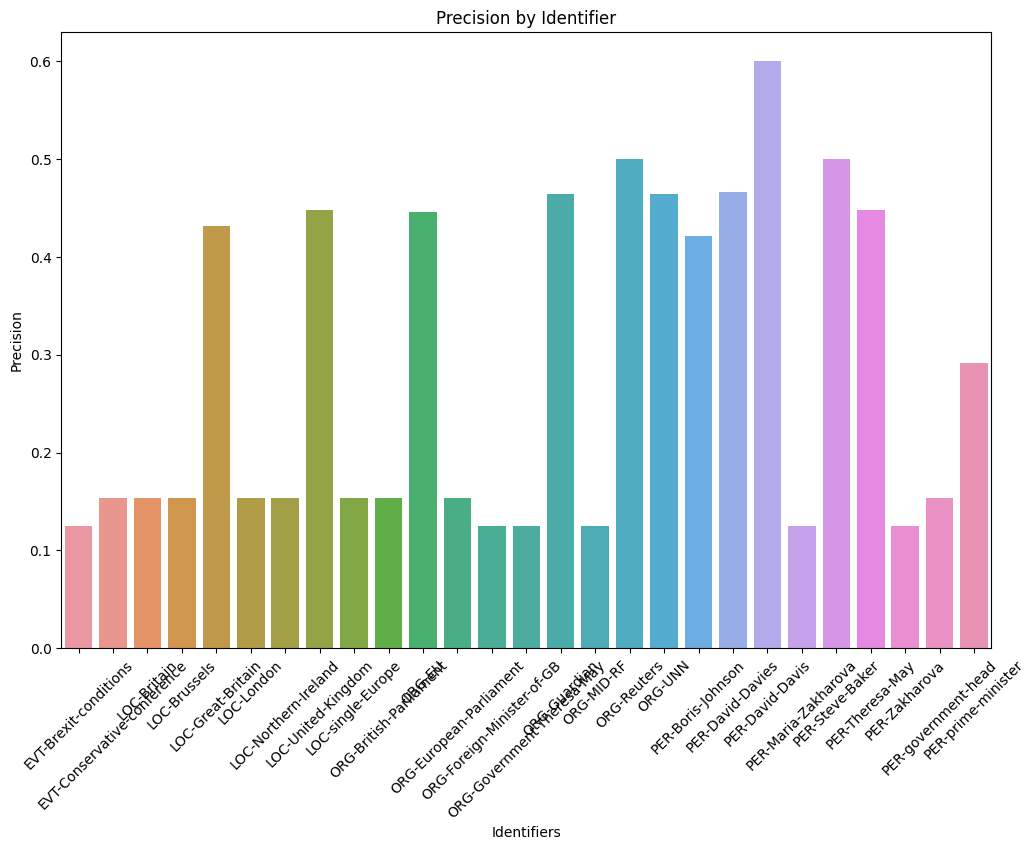

In [39]:
plt.figure(figsize=(12, 8))
sns.barplot(x=aggregated_metrics.index, y='Precision', data=aggregated_metrics)
plt.title('Precision by Identifier')
plt.xticks(rotation=45)
plt.show()

### Тут мы можем сделать вывод что точнее всего предсказываются имена, а хуже всего предсказываются ивенты и большиснтво локаций. Лучше всего предсказывается Борис Джонсон (скорее всего это связано с тем что он используется в примере)

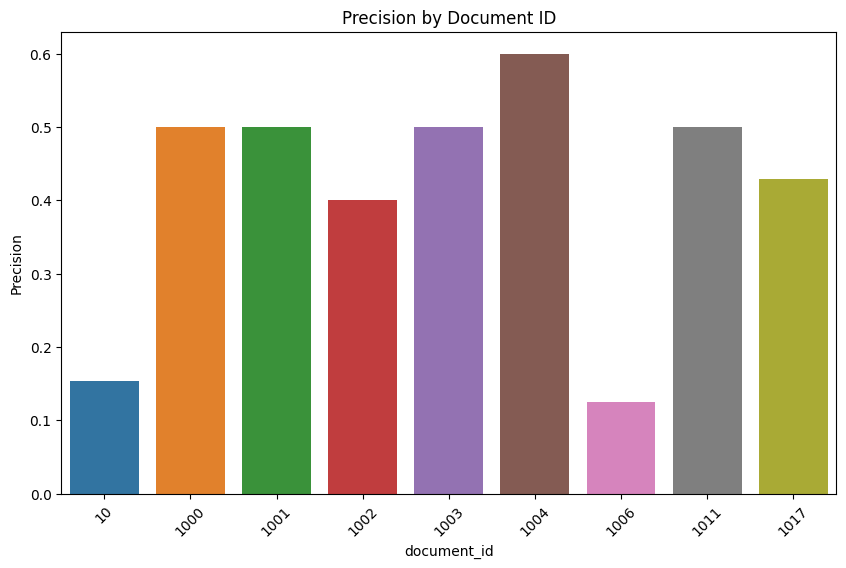

In [40]:
document_metrics = df_all.groupby('document_id')['Precision', 'Recall', 'F1 Score'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=document_metrics.index, y='Precision', data=document_metrics)
plt.title('Precision by Document ID')
plt.xticks(rotation=45)
plt.show()

# Задание 7

In [41]:
df_all['document_length'] = df_all['document_text'].apply(lambda x: len(x.split()))

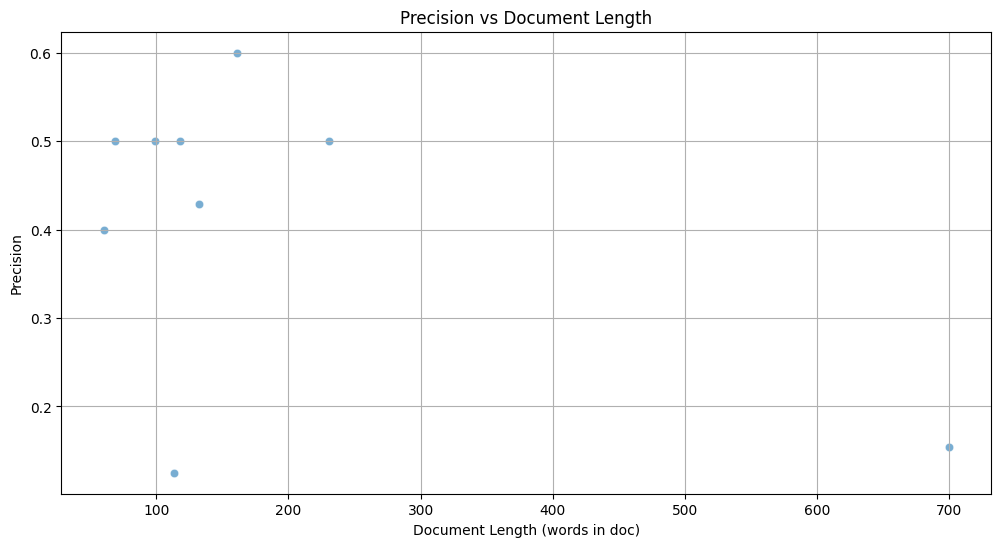

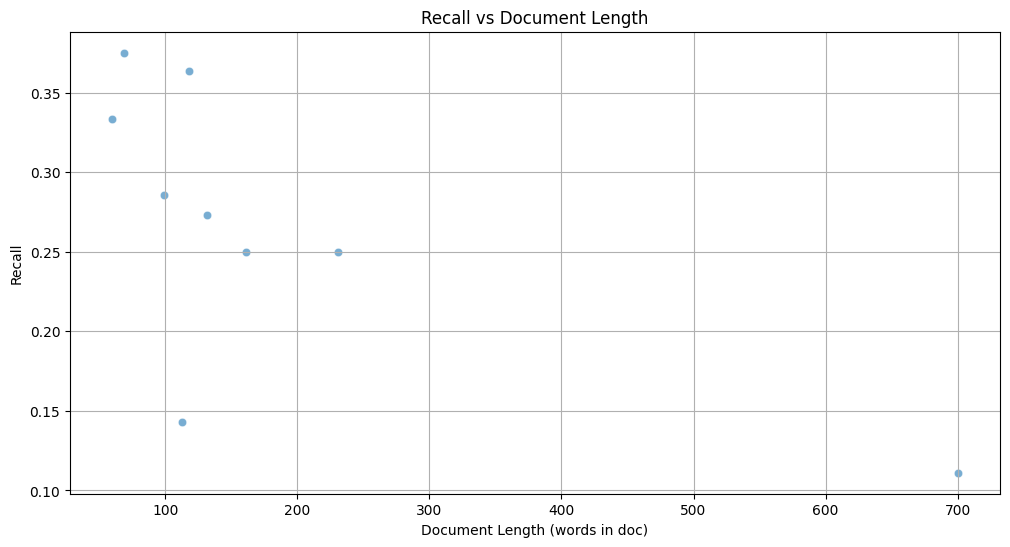

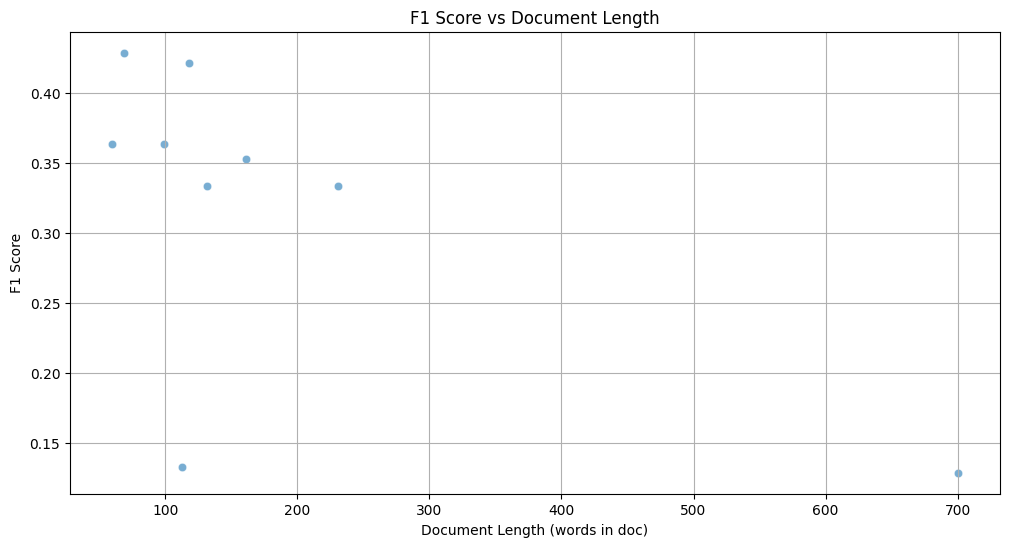

In [42]:
# Визуализация зависимости Precision от длины документа
plt.figure(figsize=(12, 6))
sns.scatterplot(x='document_length', y='Precision', data=df_all, alpha=0.6)
plt.title('Precision vs Document Length')
plt.xlabel('Document Length (words in doc)')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

# Визуализация зависимости Recall от длины документа
plt.figure(figsize=(12, 6))
sns.scatterplot(x='document_length', y='Recall', data=df_all, alpha=0.6)
plt.title('Recall vs Document Length')
plt.xlabel('Document Length (words in doc)')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

# Визуализация зависимости F1 score от длины документа
plt.figure(figsize=(12, 6))
sns.scatterplot(x='document_length', y='F1 Score', data=df_all, alpha=0.6)
plt.title('F1 Score vs Document Length')
plt.xlabel('Document Length (words in doc)')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()

In [43]:
df_result = df_all[['document_id', 'entity', 'entity_vec']]

In [44]:
df_result.to_csv('solution.csv', index=False, sep=';', encoding='utf-8')

### Из этих графиков мы можем понять что recall и f1 скор линейно зависимы от размера текста, чем тект больше тем меньше recall (количество слов которые мы не отдетектили) и f1. У Precision такой яркой зависимости нет. 

# Задание 8-9

Во время испытания различных промптов я сделал несколько ключевых выводов. 
1) Самой главной проблемой с которой я столкнулся стало то что гигачат считает, что всегда достаточно одного упоминания одной сущности, и если сущность употребляется в тексте еще раз другой форме, то не выписывает его еще раз. При этом даже дополнительно указание на эту интрукцию в последующем промте не помогает решить проблему.

2) Гигачат теряет точность опредления сущности по ходу диалога: то есть если в одном диалоге с гигачатом последовательно присылать запросы для поиска сущностей в разных текстах, с каждым разом он будет выдавать все меньше разных сущностей. Логику выбора сущностей полностью я не понял но больеш всего этопохоже на intesection сущностей в разных текстах.

3) Сущности детектятся довольно хорошо, но точность зависит от уровня абстракции, то есть чем конкретнее названа сущность тем выше шанс что модель ее отдетектит. Например: у сущности "Сергей Лавров" больше шансов быть задатекченной чем у сущности "Мид РФ".

4) Классификация отрабатывает на высоком уровне. Почти во всех случаях указывается нужный класс.

5) Лучше всего предсказываются люди, а хуже всего огранизации. 

### Основным подходом для улучшения точности предсказаний этой модели является правильный выбор промпта. Помимо описанного выше промпта котоырй использовался для получения предсказаний, я пробовал попросить гигачат представить что он должен работать как ЯП и проитерироваться по тексту выводя каждую новую сущность, однако и в этом случае гигачат пыводл сет сущностей. Но мне кажется что можно двигаться именно в подобном направлении для вывода всех всхождений и всех форм одной сущности.

Я научился нескольким вещам из этого проекта: во первых я почитал про использование некоторых классических методов, для решения этой задачи, то есть сначала я представлял для себя решение жтой задчи только через lstm. Теперь же я почиал про использование моделей основанных на знакомых мне с курса стохастических процессов Марковых цепях, И посмотрел на то как используется bert для этой задачи. 


Помимо этого, ествественно, для меня новым стало использвоание LLM для решения подобной задачи. Более того ранее я решал задачи nlp с помощью LLM только неосозанно (не задумывался о том что решаю именно nlp задачу по время работы с LLM). 